# Plotting

There are various plotting/visualisation options in Python:
- [**Matplotlib**](https://matplotlib.org/) *is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments *
- [**seaborn**](https://seaborn.pydata.org/) *is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.*
- [**Bokeh**](https://bokeh.pydata.org/en/latest/) *is an interactive visualization library that targets modern web browsers for presentation.*
- [**Plotly**](https://plot.ly/python/) *makes interactive, publication-quality graphs online*
- [**Pygal**](http://pygal.org/en/stable/): *PYthon svg GrAph plotting Library*
- [**ggplot**](http://ggplot.yhathq.com/) *is a plotting system for Python based on R's [ggplot2](http://ggplot2.org/) and the [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448).*

All have pros and cons, and are at varying levels of 'maturity'. For example, Matplotlib is the oldest (2003), most complete and most 'traditional' - i.e. designed for making non-interactive graphs for printing. Matplotlib lacks some of the web-focussed tools of Bokeh and Plotly, which are relative newcomers focussed on generating plots to display electronically and on the web. Pygal and ggplot are more esoteric - the former focussed on producing plots in SVG format, and the latter focussed on emulating the syntax and appearance of the `ggplot2` R plotting package.

In science we mostly focus on producing publication-quality plots for printing, so we'll focus on Matplotlib here.

<div style="float:left;width:100%;margin-top:10pt;margin-bottom:5pt;">
<a href="https://matplotlib.org"><img src="https://matplotlib.org/_static/logo2.png" width="20%" align="left"></a>
</div>

Matplotlib is the most 'mature' and feature-rich Python plotting library. If you can think it, you can plot it... with a little effort. The downside of this flexibility is that it has *a lot* of options, which can be initially intimidating.

A fantastic resource for getting started is the [Matplotlib Gallery](https://matplotlib.org/gallery.html) - a collection of plot examples showing different types of plots, and the code behind them.

The part of matplotlib you'll interact with most is `pyplot`, which provides a MATLAB-like plotting interface. To import `pyploy`:

In [1]:
import matplotlib.pyplot as plt  # import pyplot, and call it 'plt'

# this tells jupyter notebook to display plots 'in line' in the browser
# you can also have interactivity by replacing 'inline' by 'notebook', but this can be much slower
%matplotlib inline

## First Plot

In [2]:
import numpy as np  # import numpy for generating some data

# generate some 'dummy' data
x = np.linspace(0, 100, 50)
y = x * 2.5 + np.random.normal(3, 23, 50)

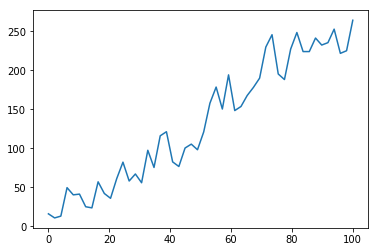

In [3]:
# make a simple line plot
plt.plot(x, y)

`plt.plot` is `pyplot`'s most basic plotting command. By default it creates a line plot, but you can specify various options to change the plot type and appearance:

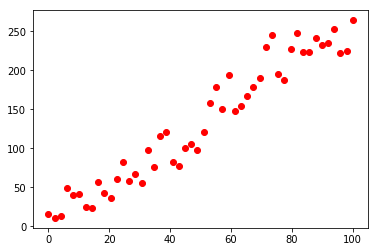

In [4]:
plt.plot(x, y, 'ro')

`'ro'` can be replaced with all kinds of options that are shorthand for different ploting styles. In the case of `ro`, the `r` specifies 'red', and the `o` specifies circular points. See the ['Notes' section of the `plot` function documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for a full list of options.

Next, let's add some all-important axis labels:

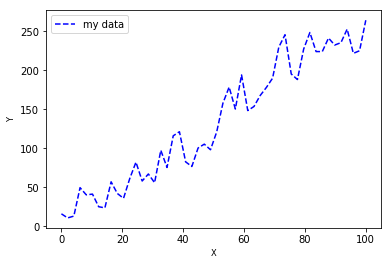

In [5]:
plt.plot(x, y, 'b--', label='my data')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

And there it is - a publication-quality plot! But there's much, much more.

## `Figures` and `Axes`

A `matplotlib` plot is made up of two key elements: the `figure` and the `axes`. A `figure` has a size and shape that defines the space where you can draw `axes`. `axes` are placed within the figure, and are where visual representations of your data (lines, points, colours) are drawn. The `axes` contain a number of visual settings controlling the appearance of axes, points and lines, and a coordinate transfer system, which translates a sapce on your page to a value in your data.

The `plot` function used above provides a convenient 'wrapper' for matplotlib that automatically handles the creation of your `figure` and the placement of your `axes`. This is great for rapidly producing simple plots of data, but if you're looking to do anything more complex it pays to get familiar with `figure` and `axes` objects, so:

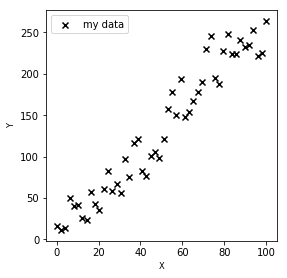

In [6]:
# create a figure
fig = plt.figure(figsize=(4,4))

# create and axis
ax = fig.add_axes([.1, .1, .8, .8])
#                 ^ this specifies the position and size of the axis in the figure.
#                   the numbers are the [left, bottom, width, height] of the axis in
#                   fractional coordinates.

# ax2 = fig.add_axes([.7, .7, .2, .2])

# now, draw the points on the axis
ax.scatter(x, y, color='k', marker='x', label='my data')

# axis labels
ax.set_xlabel('X')  # note the syntax is slightly different here - you have to use 'set_' when dealing with a di
ax.set_ylabel('Y')

# add a legend
ax.legend()

That's a lot more complex than just doing `plt.plot`, with an identical result... why would I do this?

This is a bad example, because the plot is so simple. If you wanted to make a more complex plot, you'll quickly run into the limitations of `plt.plot`. Using `figure` and `axis` objects like this is a good habit to get into, as it's *much* more flexible.

However, you don't always have to manually add and locate `axes` on your `figure`. Having multiple panels on a single graph is common enough that this has been automated:

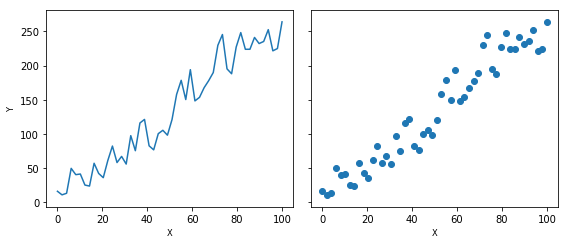

In [7]:
# creat and axis with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[8,3.5], sharey=True)

# plot number 1
ax1.plot(x, y)
# plot number 2
ax2.scatter(x, y)

# set axis labels
ax1.set_xlabel('X')
ax2.set_xlabel('X')
ax1.set_ylabel('Y')

# get rid of excess space between the axes
fig.tight_layout()

### `plt.subplots` vs. `fig.add_subplot`

The former creates a grid of subplots in a figure and returns both. The latter can be used to add new subplots to an existing figure, using an underlying grid to position the subplots.

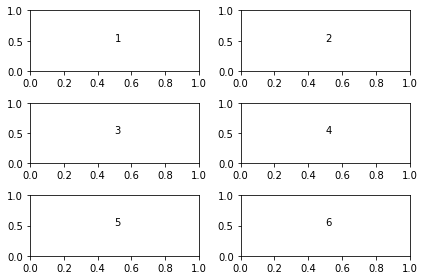

In [8]:
# make figure
fig = plt.figure()

# make six subplots
for i in range(1,7):
    ax = fig.add_subplot(3, 2, i)  # (rows, columns, subplot_number)
    # add an annotation, so you can see which panel is associated with which number
    ax.annotate(str(i), (.5, .5))

# make the layout sensible
plt.tight_layout()

This can be much more useful than `plt.subplots`, as it allows you to manually specify which axes you want (e.g. if you don't want the full grid), and you can create subplots which fill more than one position on the grid. For example:

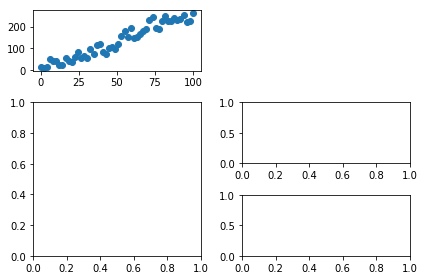

In [9]:
fig = plt.figure()

ax_top = fig.add_subplot(3, 2, 1)
ax_big = fig.add_subplot(3, 2, (3,5))
ax_right1 = fig.add_subplot(3, 2, 4)
ax_right2 = fig.add_subplot(3, 2, 6)

# you can then draw points on the axes by using the axis objects directly, for example:
ax_top.scatter(x, y)

plt.tight_layout()

# Examples

## Data with fitted line

In [10]:
import uncertainties as un
from uncertainties import unumpy as unp

In [11]:
# fit x,y data with line (1st order polynomial), and get the covariance matrix
p, cov = np.polyfit(x, y, deg=1, cov=True)

fit_params = un.correlated_values(p, cov)

# predicted data
pred = np.polyval(fit_params, x)

# extracr mean and stdev
pred_nom = unp.nominal_values(pred)
pred_err = unp.std_devs(pred) * 1.96
# 1.96 to convert standard deviation to 95% confidence interval

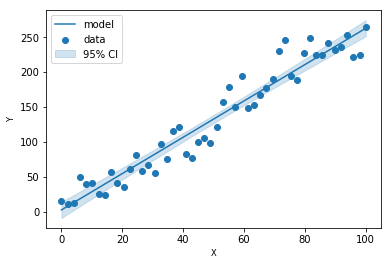

In [12]:
fig, ax = plt.subplots(1,1)

# plot raw data
ax.scatter(x, y, label='data')

# plot fitted line
ax.plot(x, pred_nom, label='model')

# plot uncertainty envelope
ax.fill_between(x, pred_nom + pred_err, pred_nom - pred_err, color='C0', alpha=0.2, label='95% CI',
                zorder=-1)  # zorder sets the 'vertical' of elements on the axis

# axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# legend
ax.legend()

## Histogram

For example, of the model-data residuals

Text(0,0.5,'N')

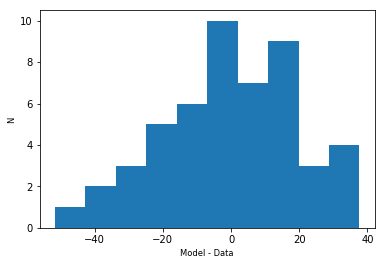

In [13]:
# calculate residuals
resid = pred_nom - y

fig, ax = plt.subplots(1, 1)

ax.hist(resid, 10)

ax.set_xlabel('Model - Data')
ax.set_ylabel('N')

## Images (/gridded data)

In [14]:
# make an image

# define X and Y axes
X = np.linspace(-32, 160, 100)
Y = np.linspace(-60, 77, 100)
# turn X and Y axes into a grid
XX, YY = np.meshgrid(X, Y)

# create some synthetic data
def distance(x, y, centre):
    """Calculate distance from centre point."""
    return np.sqrt((x - centre[0])**2 + (y - centre[1])**2)

c = (149.13, -35.28)  # center of feature
Z = np.sin(0.2 * distance(XX, YY, c))  # sine wave radiating from center
Z += np.random.normal(0, .1, XX.shape)  # some noise

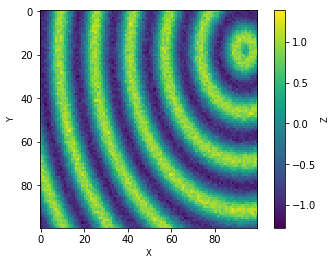

In [15]:
fig, ax = plt.subplots(1, 1)

# draw an image
im = ax.imshow(Z)
cb = fig.colorbar(im)  # create a colour bar

# labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
cb.set_label('Z')

but X and Y data are incorrect...?  By convention, images don't have X and Y axes, and the 'origin' is in the top left. This can be quite disorienting if you have gridded data with defined X and Y axes, and you want to relate the image to physical coordinates. You *can* get the scales right in the image by fiddling around with axis limits, but this is fiddly, and gets very boring very quickly. A better option:

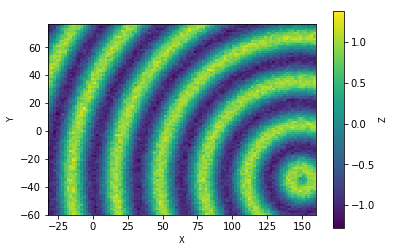

In [16]:
fig, ax = plt.subplots(1, 1)

# draw a 'pseudocolor 2D mesh' of the data
im = ax.pcolormesh(XX, YY, Z)  # this also takes the X and Y grids
cb = fig.colorbar(im)  # create a colourbar

# set aspect ratio
ax.set_aspect(1)

# labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
cb.set_label('Z')

Much more useful for most scientific applications, where you want to keep track of spatial dimensions.

#### Colour Scales

Are important. Matplotlib has put [a lot of effort](https://matplotlib.org/tutorials/colors/colormaps.html) into making them good.

Main points:
- Around 10% of men are colourblind. Given academic demographics, this means that >5% of your audience will be.
- Use *perceptually uniform colour scales*. These avoid introducing artefacts in your data, and will look sensible in colour, black and white, and to colourblind people.

Colour scales are called 'colourmaps' - they're used to 'map' your data from a value to a colour. Colourpams live in:

```python
plt.cm.
```

**Hint**: try tying `plt.cm.` followed by <kbd>Tab</kbd> to see all available colour maps.

To use a different colourmap:

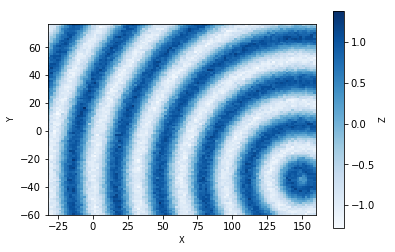

In [17]:
fig, ax = plt.subplots(1, 1)

# draw an image
im = ax.pcolor(XX, YY, Z, cmap=plt.cm.Blues)  # now we give it the X and Y coordinates too!
                          # This is how you specify colourmaps. You can do this
                          # in any plot where you're 'mapping' a continuous variable
                          # to a colour scale (i.e. image, pcolor, and scatter plots)
cb = fig.colorbar(im)

# set aspect ratio
ax.set_aspect(1)

# labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
cb.set_label('Z')

## Maps : Geographic Data

I'm using `cartopy` here - the main mapping library in Python. You may also read about `basemap` on the web, but this is gradually being phased out in favour of `cartopy`, so this is the best one to learn.

Installing it can be a bit tricky. The most reliable way is with `conda`:

```bash
conda install cartopy
```

I'm sure it's possible with `pip` too, but I've heard of people running into problems.

In [18]:
import cartopy
import cartopy.crs as ccrs  # Coordinate Reference Systems

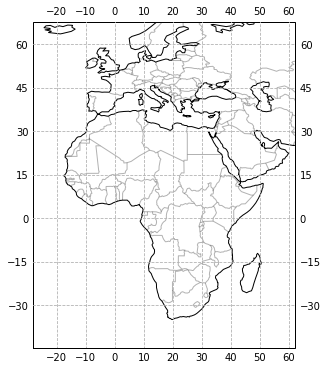

In [19]:
# create a figure
fig = plt.figure(figsize=[6, 6])

# add an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# add 'features' to the map
ax.add_feature(cartopy.feature.LAND, color=(1,1,1,0.9))  # land masses
ax.add_feature(cartopy.feature.COASTLINE)  # coast lines
# draw country borders
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', scale='110m'), 
               edgecolor=(0,0,0, 0.3), facecolor=(0,0,0,0))

# set view window
ax.set_extent([-28, 62, -35, 60])  # [left, right, bottom, top]

# add lat/lon grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', zorder=3)

### Scatter Points on a map

In [20]:
N = 150
lons = np.random.uniform(0, 120, N)
lats = np.random.uniform(-30, 79, N)
values = np.sin(0.62 * np.sqrt((lons - c[0])**2 + (lats - c[1])**2))

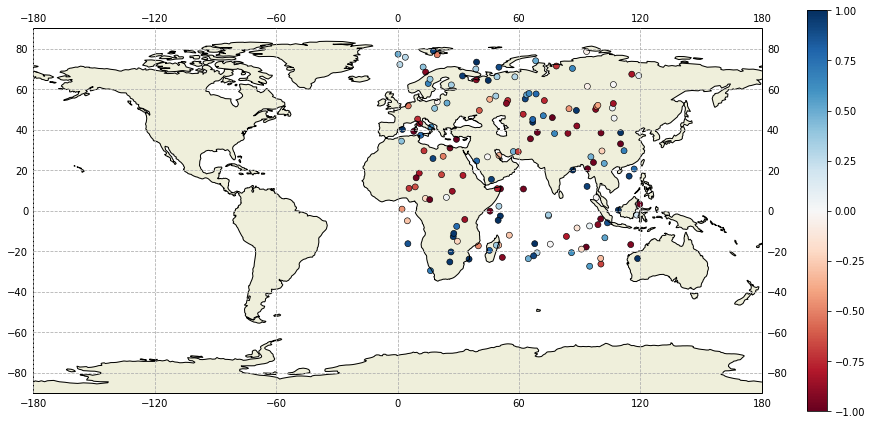

In [21]:
# create a figure
fig = plt.figure(figsize=[13, 6])

# add an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

cp = ax.scatter(lons, lats, transform=ccrs.PlateCarree(),  
                # note use of 'transform' here to tell it the coordinate system
                c=values, vmin=-1, vmax=1, cmap=plt.cm.RdBu,  
                # note use of 'c=' here to specify point colour. This works with any continuous variable.
                edgecolor='k', linewidth=0.6)
                # this puts a line around the markers

fig.colorbar(cp)

# draw coastlines
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)

ax.set_extent([-180, 180, -90, 90])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', zorder=3)

fig.tight_layout()

#### Gridded Data

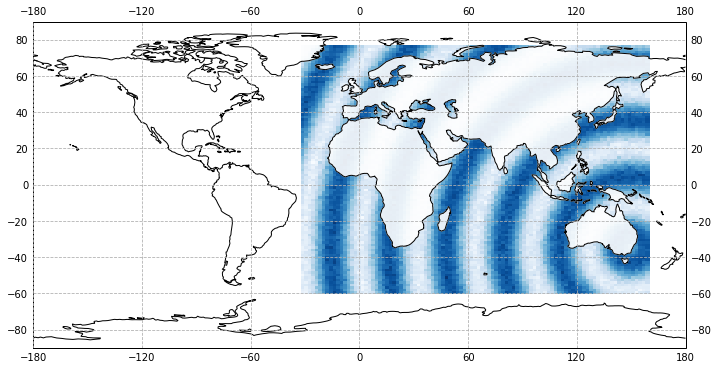

In [22]:
# create a figure
fig = plt.figure(figsize=[12, 6])

# add an axis with a map projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.pcolormesh(XX, YY, Z, transform=ccrs.PlateCarree(), cmap=plt.cm.Blues)
# again - note use of 'trasform' to tell it the coordinate system.

# draw coastlines
ax.add_feature(cartopy.feature.LAND, color=(1,1,1,0.9), zorder=2)
ax.add_feature(cartopy.feature.COASTLINE, zorder=2)

ax.set_extent([-180, 180, -90, 90])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', zorder=3)

## Crossplots [`corner`](https://corner.readthedocs.io/en/latest/)

A nice library for creating crossplots of complex data. Worth a look!

## [Matplotlib Gallery](https://matplotlib.org/gallery.html)

A fantastic resource for working out how to draw different types of plots. Has figures with example code.

## [Style Sheets](https://matplotlib.org/users/customizing.html)

Style Files allow you to heavily customize your plot options, making many things like symbol size, font size or line width automatic.

You can directly modify the matplotlibrc file that contains the default settings to make them permanent on your system.

However, there is better ways to indicate your preferences locally, as they may change from one paper to another, and one publisher to another.

The first option is to modify the matplotlibrc params directly in the notebook, after calling matplotlib.

For instance, to get the x and y label fontsize to 12, we can do:

In [23]:
import matplotlib # this time we need the full import
matplotlib.rcParams['axes.labelsize'] = 16

and now if we make a plot...

Text(0,0.5,'Y')

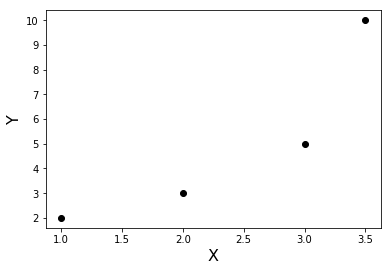

In [24]:
plt.plot([1,2,3,3.5],[2,3,5,10.],'ko')
plt.xlabel("X")
plt.ylabel("Y")

Making the labels at 42 and the dots size 16, and the background cyan

Text(0,0.5,'Y')

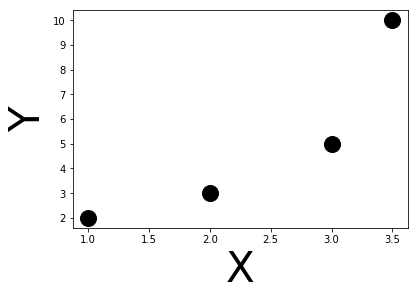

In [25]:
matplotlib.rcParams['axes.labelsize'] = 42
matplotlib.rcParams['lines.markersize'] = 16
plt.plot([1,2,3,3.5],[2,3,5,10.],'ko')
plt.xlabel("X")
plt.ylabel("Y")

Ok, now there is an even clever way of doing that without indicating the rc params in the notebook: using style files.
    
Style files are usually located in ~/.matplotlib/stylelib/ on Unix system (I don't know on Windows...)

But you can put them anywhere. Following the indicating of the [Matplotlib help](https://matplotlib.org/users/customizing.html), you can modify the properties you want to modify by setting them correctly in a style file, and then calling it in you notebook.

The trick is that you can put those files wherever you want, as long as you indicate the good path to the calling command.

I have put one that I used for a Springer book in this folder. I can call it and plot again my dots:

Text(0,0.5,'Y')

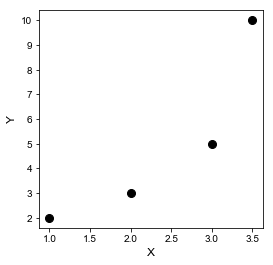

In [26]:
plt.style.use('./springer_1c.mplstyle')
plt.plot([1,2,3,3.5],[2,3,5,10.],'ko')
plt.xlabel("X")
plt.ylabel("Y")

# Using color bars on a series of data (e.g. spectra of something)

Sometime you have 5 spectra and you want to plot them as a function of something, e.g. the number of frogs present this day (was rainy today...).

You can do that in a loop and assign colors manually (bad call), or use the colorbar features of matplotlib (clever!):

(this solution is from [stackoverflow](https://stackoverflow.com/questions/26545897/drawing-a-colorbar-aside-a-line-plot-using-matplotlib?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa))


In [27]:
import matplotlib

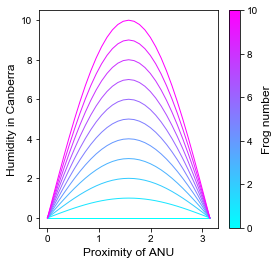

In [28]:
# an array of parameters, i.e. number of frogs, each of our curves depend on a specific
# value of frog number
parameters = np.linspace(0,10,11)

# norm is a class which, when called, can normalize data into the
# [0.0, 1.0] interval.
norm = matplotlib.colors.Normalize(
    vmin=np.min(parameters),
    vmax=np.max(parameters))

# choose a colormap
c_m = matplotlib.cm.cool

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

# plotting 11 sines of varying amplitudes, the colors are chosen
# calling the ScalarMappable that was initialised with c_m and norm
x = np.linspace(0,np.pi,31)
for parameter in parameters:
    plt.plot(x,
             parameter*np.sin(x),
             color=s_m.to_rgba(parameter))

# having plotted the 11 curves we plot the colorbar, using again our
# ScalarMappable
c_bar = plt.colorbar(s_m)
c_bar.set_label(r"Frog number")

plt.xlabel('Proximity of ANU')
plt.ylabel('Humidity in Canberra')

# That's all, folks
plt.show()

# Ternary Plots

Ternary plots can be made using the 'python-ternary' package.

We can show points for specific compositions there

In [29]:
import ternary

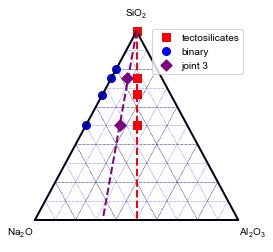

In [30]:
# points
tecto = np.array([[0,100.0],[12.5, 75,12.5],[16.67, 66.66,16.67],[25, 50,25]])
binary =np.array([[0, 66,33],[0, 80,20],[0, 75,25],[0,50,50]])
join3 =np.array([[8,75,17.],[16.66,50,33.33]])


# make figure
figure, tax = ternary.figure(scale=100)

# Draw Boundary and Gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="black", multiple=20)
tax.gridlines(color="blue", multiple=10, linewidth=0.5)

# Plot the data
tax.scatter(tecto, marker='s', color='red',label="tectosilicates")
tax.scatter(binary, marker='o', color='blue',label="binary")
tax.scatter(join3, marker='D', color='purple',label="joint 3")

# Show lines
tax.line([0,100,0],[50,0,50],linestyle='--',linewidth=2.0,color='red')
tax.line([0,100,0],[33.33,0,66.66],linestyle='--',linewidth=2.0,color='purple')

# put names at corners
tax.legend()
tax.top_corner_label(r'SiO$_2$')
tax.right_corner_label(r'Al$_2$O$_3$')
tax.left_corner_label(r'Na$_2$O')

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

a = figure.axes[0]
a.axes.set_frame_on(False)

In [31]:
matplotlib.matplotlib_fname()

'/home/oscar/.config/matplotlib/matplotlibrc'

# Using Gridspec

Gridspec provides a fine-tune control for subplots.

See [there](https://matplotlib.org/users/gridspec.html) for more info!

Text(0.5,0.5,'Something\nelse')

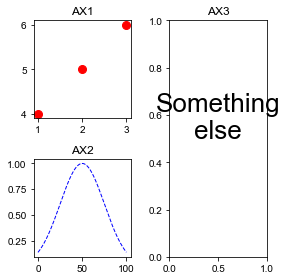

In [32]:
import matplotlib.gridspec as gridspec

# it is recommended to create a figure object with gridspec
fig = plt.figure()

# we define the grid, a 2 by 2 one
gs = gridspec.GridSpec(2, 2)

# we assign subplots
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[:,1])

# setting titles
ax1.set_title('AX1')
ax2.set_title('AX2')
ax3.set_title('AX3')

# tight_layout() : it apply to the fig() object, so those are the same values for the entire figure... 
# If you want more control, you will have to do that manually...
fig.tight_layout()

# you can later call the figure objects for plotting
ax1.plot([1,2,3],[4,5,6],"ro",label="dummy data #1")
ax2.plot(np.arange(0,100,0.1),np.exp(-1/2*((np.arange(0,100,0.1)-50)/25)**2),"b--",label="Gauss")
ax3.annotate("Something\nelse",(0.5,0.5),ha='center',fontsize=26)

# Obspy : for seismologists!

See documentation [here](http://docs.obspy.org/tutorial/index.html)

In [ ]:
from obspy import read

st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
tr = st[0]  # assign first and only trace to new variable
st.plot()